In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("C:/Users/0526p/Jupyter/intershala ml training/ML M5/Transformed_Housing_Data2.csv")

In [6]:
data.head(5)

Sale_Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
0    221900.0               3             1.00               1180.0   
1    538000.0               3             2.25               2570.0   
2    180000.0               2             1.00                770.0   
3    604000.0               4             3.00               1960.0   
4    510000.0               3             2.00               1680.0   

   Lot Area (in Sqft)  No of Floors  No of Times Visited  Overall Grade  \
0              5650.0           1.0                    0              7   
1              7242.0           2.0                    0              7   
2             10000.0           1.0                    0              6   
3              5000.0           1.0                    0              7   
4              8080.0           1.0                    0              8   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  ...  \
0                                     1180.0                        0  ...   
1                                     2170.0                      400  ...   
2                                      770.0                        0  ...   
3                                     1050.0                      910  ...   
4                                     1680.0                        0  ...   

   Waterfront_View_Yes  Zipcode_Group_Zipcode_Group_1  \
0                    0                              0   
1                    0                              0   
2                    0                              0   
3                    0                              0   
4                    0                              0   

   Zipcode_Group_Zipcode_Group_2  Zipcode_Group_Zipcode_Group_3  \
0                              0                              0   
1                              1                              0   
2                              1                              0   
3                              0                              1   
4                              0                              0   

   Zipcode_Group_Zipcode_Group_4  Zipcode_Group_Zipcode_Group_5  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              1                              0   

   Zipcode_Group_Zipcode_Group_6  Zipcode_Group_Zipcode_Group_7  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Zipcode_Group_Zipcode_Group_8  Zipcode_Group_Zipcode_Group_9  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 31 columns]

This is the simplest prediction model: simple mean regression model

In [7]:
from matplotlib import pyplot as plt

In [8]:
data['mean sales'] = data["Sale_Price"].mean()

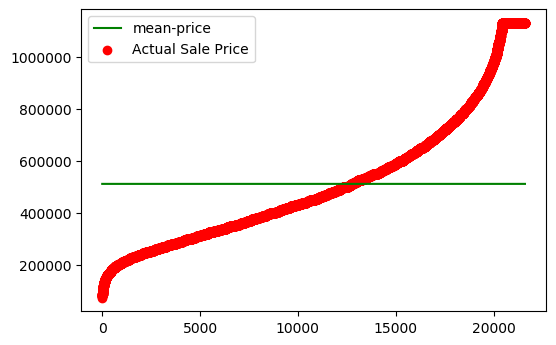

In [9]:
plt.figure(dpi = 100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot(k, data['mean sales'].sort_values(), color='green', label='mean-price')
plt.legend()

# T1_V2
### Regression Model: based on categorical variable

In [10]:
import numpy as np

In [11]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc=np.mean)
grades_mean

Overall Grade        1          2              3              4   \
Sale_Price     142000.0  1129575.0  205666.666667  214381.034483   

Overall Grade             5             6              7              8   \
Sale_Price     248523.971074  301882.01472  402239.619779  537584.082097   

Overall Grade             9              10  
Sale_Price     736936.769025  960408.078866

In [12]:
data['grade mean'] = 0
for i in grades_mean.columns:
    data['grade mean'][data['Overall Grade']==i] = grades_mean[i][0]
    
data['grade mean'].head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade mean, dtype: float64

In [13]:
gradewise_list = []
for i in range(1, 11):
    k = data['Sale_Price'][data['Overall Grade']==i]
    gradewise_list.append(k)
    
gradewise_list

[19450    142000.0
 Name: Sale_Price, dtype: float64, 4409     1129575.0
 4809     1129575.0
 5449     1129575.0
 6039     1129575.0
 7033     1129575.0
 7250     1129575.0
 7905     1129575.0
 9252     1129575.0
 10371    1129575.0
 13409    1129575.0
 13698    1129575.0
 14554    1129575.0
 19015    1129575.0
 Name: Sale_Price, dtype: float64, 1147     75000.0
 3221    262000.0
 5830    280000.0
 Name: Sale_Price, dtype: float64, 348      299000.0
 463       80000.0
 1064     140000.0
 3580     355000.0
 3883     248000.0
 4866     228000.0
 5202     352000.0
 6478     217000.0
 7971     120000.0
 8595     205000.0
 8617     355000.0
 8621     325000.0
 9639     330000.0
 9792     435000.0
 11498    229050.0
 11586    188000.0
 12073    156000.0
 13999    130000.0
 14089    152000.0
 14579     95000.0
 15038    200000.0
 15710    150000.0
 16338    100000.0
 16528     90000.0
 17392    145000.0
 18050    247000.0
 18164    230000.0
 18377    265000.0
 19342    151000.0
 Name: Sale_Pr

In [14]:
classwise_list = []
for i in range(1, 11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

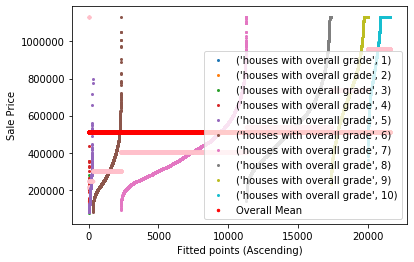

In [15]:
z = 0
for i in range(1, 11):
    points= [k for k in range(z, z+len(classwise_list[i-1]))]
    plt.scatter(points, classwise_list[i-1].sort_values(), label = ('houses with overall grade', i), s = 4)
    plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s = 6, color = 'pink')
    
    z = max(points)+1
    
plt.scatter([q for q in range(0, z)], data['mean sales'], color= 'red', label='Overall Mean', s = 6)
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.legend(loc = 4)

# T1_V3
### Residual Plot

- Residual = Prediction - Actual
- A residual plot is a scatter plot of difference between prediciton and actual

In [16]:
mean_difference = data['mean sales']-data['Sale_Price']
grade_mean_difference = data['grade mean']-data['Sale_Price']

- The zero line representing residulas of a perfect model which would be zeros
- The mean regression based on a categorical feature will give better results

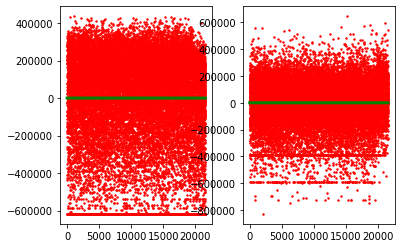

In [17]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.subplot(1, 2, 1)
plt.scatter(k, mean_difference, color = 'red', label='Residulas', s = 2)
plt.plot(k, l, color = 'green', label = 'mean Regression', linewidth = 3)

plt.subplot(1, 2, 2)
plt.scatter(k, grade_mean_difference, color = 'red', label = 'Residuals', s = 2)
plt.plot(k , l, color = 'green', label = 'mean Regression', linewidth = 3)


# T1 V4
### Model Evaluation Metrics
- Calculate error corresponding to the mean regression model
- Evaluate the regression model performace using different metrics such as:
    * Mean Absolute Error (MAE)
    * Mean Square Error (MSE)
    * Root Mean Square Error(RMSE)
- Individual Error Term
    * Residual = Prediction - Actual
- Mean Error
    * Mean Error = ∑(Prediction−Actual)/𝑁


In [18]:
# the erros cancle out each other and leads to mean error begin 0 in mean regression model
cost = sum(mean_difference)/len(data)
round(cost, 7)

0.0

#### Mean Absolute Error or MAE
- Take the absolute value of each individual error term, sum it up for all the data points and then take a mean.
- Consider that:
    * Ŷ : be the predicted values
    * Y : be the actual values
    * n : be the total number of data points
- The residual or individual error term is given as:
    * MAE = ∑(|Ŷ-Y|)/n
- Find out:
    * whether we still get mean absolute error as zero
    * whether the mean regression model based on the "Overall Grade" was actually better
- What does MAE say?
    * The mean absolute error tells us how far, on an average, the point is expected to lie from the predicted point

In [19]:
y = data['Sale_Price']
y_hat1 = data['mean sales']
y_hat2 = data['grade mean']
n = len(data)
len(y), len(y_hat1), len(y_hat2), n

(21609, 21609, 21609, 21609)

In [20]:
cost_mean = sum(abs(y_hat1-y))/n
cost_mean

199168.78146839526

In [21]:
cost_grade_mean = sum(abs(y_hat2-y))/n
cost_grade_mean

137081.70298203363

#### calculate MAE using scikit-learn library

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
cost_grade_mean = mean_absolute_error(y_hat2, y)
cost_grade_mean

137081.7029820291

#### Mean Squre Error or MSE
- Formula:
    * MSE = (∑(Ŷ-Y)²)/n
- Square the individual errors, sum them up and then take as mean of it.
- How MSE is different and usefull than MAE
    * It turns all the differences between the actual and the predicted into a positive quantity
    * It incurs the larger difference between the actual and the predicted value
- Tells about the presence and absence of large errors
- Cons:
    * Gives the expected average distance between the actual points and the predictions

#### calculate MSE using scikit-learn library

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
cost_mean = mean_squared_error(y_hat1, y)
cost_mean

62528116847.799576

In [26]:
cost_grade_mean = mean_squared_error(y_hat2, y)
cost_grade_mean

30804835720.342426

#### Root Mean Square Error or RMSE
- Formula:
    * RMSE = √((∑(Ŷ-Y)²)/n) = √MSE
- The large errors are being penalised, yet the scale of the error is closer to that of mean absolute error

In [27]:
cost_mean = mean_squared_error(y_hat1, y)**0.5
cost_mean

250056.2273725643

In [28]:
cost_grade_mean = mean_squared_error(y_hat2, y)**0.5
cost_grade_mean

175513.06424406826

# T1 V5
#### Evaluate the regression model performance using R^2 and Adjusted R^2
- How much a model with smaller error is better than a model with larger error term
- Is there a way we can describe how good this model is in % terms
    - R^2

#### R^2
- It gives us the relative error of a regression model with respect to the simple mean regression model
- Consider that:
    * Ŷ : be the predicted values
    * Y : be the actual values
    * Ȳ : be the mean of the 'Sale Price'
- Formula:
    * R² = 1- (∑(Ŷ-Y)²/∑(Ȳ-Y)²) = 1-(MSE(model)/MSE(mean))
    * ∑(Ŷ-Y)² : n*MSE of regression model we want to evaluate
    * ∑(Ȳ-Y)² : n*MSE of simple mean model
    
- (∑(Ŷ-Y)²/∑(Ȳ-Y)²) : Lower the ratio is better the model
- When Ŷ = Y, this ∑(Ŷ-Y)² becomes zero
    * R² = 1
    * The perfect model
- When Ŷ = Ȳ, this (∑(Ŷ-Y)²/∑(Ȳ-Y)²) becomes 1
    * R² = 0
    * The mean prediction model
- For any model which is better that mean prediction model but is not a perfect model,
    * 0 < R² < 1
    * 0% < R² < 100%
- In reality: -∞ < R² < 1
- -∞ < R² < 0
    * the regression model we are trying to evaluate is even wore than the mean regression mode.

In [29]:
y = data['Sale_Price']
y_bar = data['mean sales']
y_hat = data['grade mean']
n = len(data)
len(y), len(y_bar), len(y_hat), n

(21609, 21609, 21609, 21609)

In [30]:
mse_mean = mean_squared_error(y_bar, y)
mse_mean

62528116847.799576

In [31]:
mse_model = mean_squared_error(y_hat, y)
mse_model

30804835720.342426

####  R²: The degree to which your input variables explain the variation of your target or output variable
- example:
    *  R² = 0.8 -> 80% of the variation in the output variable is explained by the input variables
- The higher the  R² is. te more is the variation explained by the input variables and hence better is the model
- is quite popular evaluation metric
- gives us a measure of model error or model performace in % terms
- is easier to understand and compare
- Drawback of  R²:
    * it will either stay the same or increase with the addition of more variables, even if thwy do not have any relationship with the output variables
    * As more input variables are added to the regression model, the value of simple  R² can no longer be relied upon
- Adjusted  R²
    * it penalizes the result for adding variables which do not imporve your existing model

In [32]:
R2 = 1-(mse_model/mse_mean)
R2

0.5073442592981836

# T2 V1

### Linear Regression
- It models the linear relationships between the dependent and the independent variables
- The best linear regressionmodel is the one that has the least error

# T2 V2
#### Parameters:
    * Equation : Y = mx + c
    * Where,
        * x  = Independent variable
        * Y = Dependent variables
        * m = slope
        * c = Intercept (what pint the lint cuts the y axis)


In [33]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data


sale_price  flat_area
0     221900.0     1180.0
1     538000.0     2570.0
2     180000.0      770.0
3     604000.0     1960.0
4     510000.0     1680.0
5    1129575.0     5420.0
6     257500.0     1715.0
7     291850.0     1060.0
8     229500.0     1780.0
9     323000.0     1890.0
10    662500.0     3560.0
11    468000.0     1160.0
12    310000.0     1430.0
13    400000.0     1370.0
14    530000.0     1810.0
15    650000.0     2950.0
16    395000.0     1890.0
17    485000.0     1600.0
18    189000.0     1200.0
19    230000.0     1250.0
20    385000.0     1620.0
21   1129575.0     3050.0
22    285000.0     2270.0
23    252700.0     1070.0
24    329000.0     2450.0
25    233000.0     1710.0
26    937000.0     2450.0
27    667000.0     1400.0
28    438000.0     1520.0
29    719000.0     2570.0

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

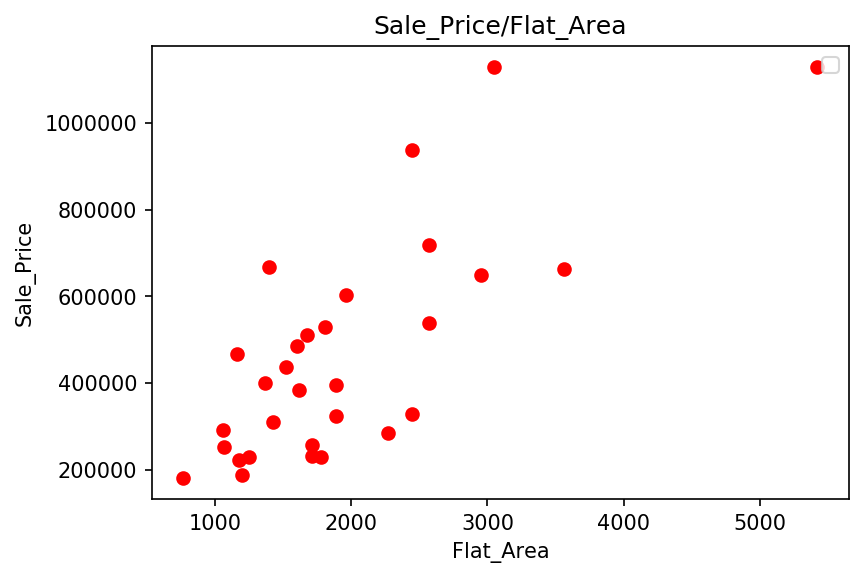

In [34]:
plt.figure(dpi= 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show

# T2 V3
#### Cost Function Cuve:
- The cost function curve or the loss function curve is the error corresponding to different models (error corresponding to lines with different slopes)

     

In [35]:
from sklearn.metrics import mean_squared_error as mse

Text(0.5, 1.0, 'Slope0with MSE281372081125.0')

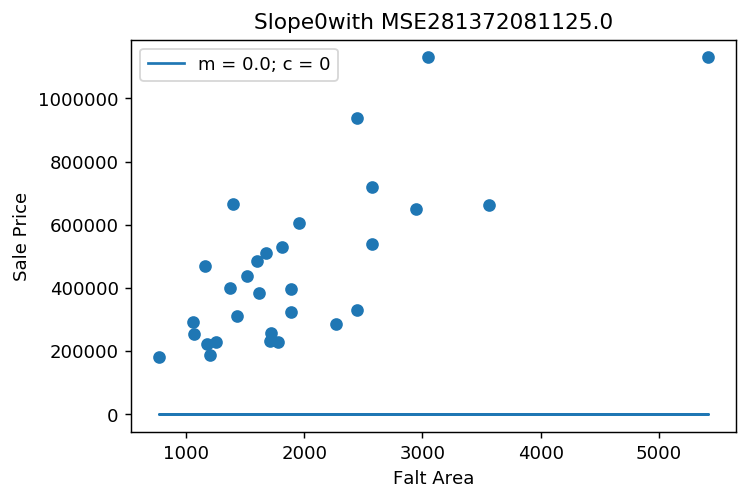

In [36]:
c = 0
m = 0
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Falt Area')
plt.ylabel('Sale Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope'+str(m)+'with MSE' + str(MSE))

- MSE is very large
- The line models the data very poorly

Text(0.5, 1.0, 'Slope50with MSE184728400708.33334')

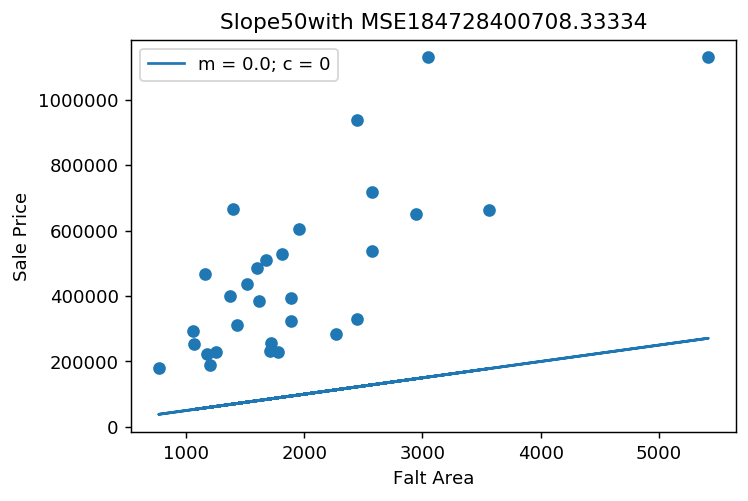

In [37]:
c = 0
m = 50
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Falt Area')
plt.ylabel('Sale Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope'+str(m)+'with MSE' + str(MSE))

- MSE is very large
- The line models the data very poorly

In [38]:
def slope_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [39]:
slope = [i/10 for i in range(0, 5000)]
Cost = []

for i in slope:
    cost = slope_Error(i, 0, sample_data)
    Cost.append(cost)

In [40]:
# Arranging in DataFrame
cost_table = pd.DataFrame({
    'slope': slope,
    'Cost' : Cost
})

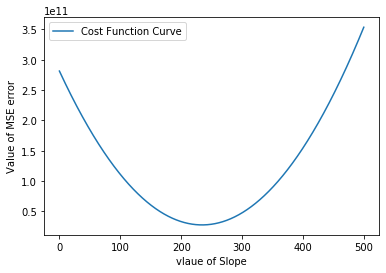

In [41]:
plt.plot(cost_table.slope, cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('vlaue of Slope')
plt.ylabel('Value of MSE error')
plt.legend()

In [42]:
lower_cost_error = cost_table['slope'][cost_table['Cost'] == cost_table['Cost'].min()].values
lower_cost_error[0]

234.3

#### Convex Curves
- Look like a bowl
- A convex curve has a minimum value at a certain point.
- The value of function on the either side of the minimum vlaue is increasing
- The minimum vlaue on the curve is the Global Minimum


#### Non Convex Curves
- A non convex curve does not have a single minimum
- Its has more than one bowl shape curve so they have their own minimum vlaues
- But the lowest one minimum vlaues is called the local minima

# T2 

#### Using Cost Function Curve to Find Parameters of Linear Rgression Model

In [43]:
def intercept_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [44]:
intercept = [i for i in range(5000, 50000)]
Cost = []
for i in intercept:
    cost = intercept_Error(234, i, sample_data)
    Cost.append(cost)

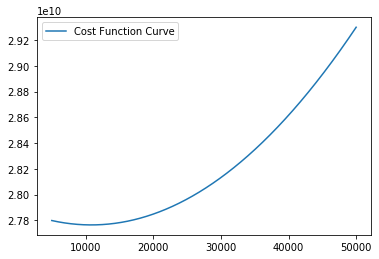

In [45]:
plt.plot(intercept, Cost, label ='Cost Function Curve')
plt.legend()

In [46]:
# Arranging in DataFrame
cost_table = pd.DataFrame({
    'intercept': intercept,
    'Cost' : Cost
})

In [47]:
lower_cost_error = cost_table['intercept'][cost_table['Cost'] == cost_table['Cost'].min()].values
lower_cost_error[0]

10834

In [48]:
slope = [i/10 for i in range(0, 5000)]
Cost = []

for i in slope:
    cost = slope_Error(i, 10834, sample_data)
    Cost.append(cost)

In [49]:
# Arranging in DataFrame
cost_table = pd.DataFrame({
    'slope': slope,
    'Cost' : Cost
})

No handles with labels found to put in legend.


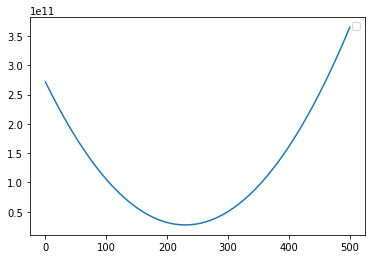

In [50]:
plt.plot(cost_table['slope'], Cost)
plt.legend()

In [51]:
new_slope = cost_table['slope'][cost_table['Cost'] == cost_table['Cost'].min()].values
new_slope[0]

229.7

In [52]:
intercept = [i for i in range(5000, 50000)]
Cost = []
for i in intercept:
    cost = intercept_Error(229.7, i, sample_data)
    Cost.append(cost)

In [53]:
# Arranging in DataFrame
cost_table = pd.DataFrame({
    'intercept': intercept,
    'Cost' : Cost
})

No handles with labels found to put in legend.


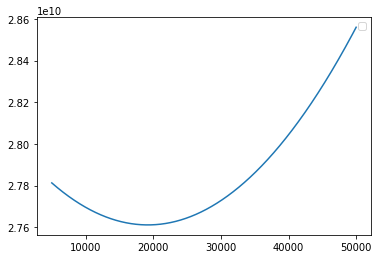

In [54]:
plt.plot(cost_table['intercept'], Cost)
plt.legend()

In [55]:
lower_cost_error = cost_table['intercept'][cost_table['Cost'] == cost_table['Cost'].min()].values
lower_cost_error[0]

19199

- we will do this again and again until we got the best fit line with the lowest error value
- The best fit line or the best linear regression model Y = 219X + 39428
- Finding the ideal slope and intercept of a line manually possible data with 1 variable
- Not possible data with several input variables
- We will use Gradient Descent Algo for finding slope and intercept data with several input variables

# T3 V1

### Gradient Descent Algorithm
Gradient Descent is an optimizaiton algorithm that works iteratively and aims to find the minimum value of a convex function with respect to a set of parameters

#### Steps to calculate the value from GDA
- Random Initialization
- Generating Predictions
- Calculating Cost
- Updaitng Parameters
- Generating Predictions Again

# T3 V2

#### Step 1: Random Initializaiton
- slope m = 0.1
- intercept c = mean of 'Sale_Price'

#### Step 2: Generate Predictions
- Equations: Ŷ = mX + C
    * Where we have already initialised the values of m and c in the previous step
    * Note: we will be representing the predicitons by the symbol Ŷ

#### Step 3: Calculating Cost
    * MSE (𝜏) = (∑(Ŷ-Y)²)/n = (∑(mX + C-Y)²)/n
    * The cost function depends upon the slope m and intercept c

#### Step 4: Updation of Parameters
    * m(new) = m(old) - Z(m)
    * C(new) = C(old) - Z(C)
    * but z vlaue is not known either it will be +ve or -ve
    * if z is +ve then m and c will decrease and vice versa
    * we will calculate z from cost function curve
    * in left z is decrease but in the right z is increase so how do we know which side will be the lower value
    * we use partial differntation: d(𝜏)/d(m)

- Calculate z value for both m and C 
    * The sign of the slope will always be the same as that of the esired value of Z(m)
    * Partial Derivatives
        G(m) = d(𝜏)/d(m) = 2 * (∑(((Xm + C-Y)*X)²/n))
        G(C) = d(𝜏)/d(C) = 2 * (∑((Xm + C-Y)/n))
        Z(m) = αG(m) and Z(C) = αG(C)
    * m(new) = m(old) - αG(m)(old)
    * C(new) = C(old) - αG(C)(old)
    * G(m) = The gradient of the cost function with respect to m
    * G(c) = The gradient of the cost funciton with respect to C
    * α = Learing rate = a constant
    * α is act as the moderator to the process of updating the parameters
    * if we take α is large then the cost fun may explode and bounce out far from the minima
    * if we take α is low then the parameters will take lot of iterations to converge to the minimal values
    * α should not be vary small or very large
    * α = 0.01

#### Previous value of cost func - new value of cost func < the threshold value (usually in terms of (10)^-x)
#### The algo has converged    

# T3 V3

### Implemeting Gradient Descent in Python

#### Step 1: Initialize Parameters

In [56]:
def param_init(Y):
    '''
    Y = target variable
    returns initialized values of m and c
    '''
    
    m = 0.1
    c = Y.mean()
    return m, c

#### Step 2: Generate Predictions

In [57]:
def generate_predictions(m, c, X):
    '''
    X = independent variables
    returns prediction generated by line with parameters m, c
    '''
    prediction = []
    for x in X:
        pred = (m*x)+c
        prediction.append(pred)
    return prediction

#### Step 3: Calculating Cost

In [58]:
def compute_cost(prediction, Y):
    '''
    returns the mean_squared_error between prediction and Y
    '''
    cost = np.sum(((prediction-Y)**2)/len(Y))
    return cost

#### Step 4: Updating prameters
- Calculating the gradients
- Using the gradients to update the parameters m and c

In [59]:
def gradients(prediction, Y, X):
    '''
    Returns Gradients corresponding to m and c
    '''
    n = len(Y)
    Gm = 2/n * np.sum((prediction-Y)* X)
    Gc = 2/n * np.sum((prediction-Y))
    return Gm, Gc

In [60]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''
    update and return the new values of m and c
    '''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

In [61]:
def result(m, c, X, Y, cost, predictions, i):
    '''
    print and plot the final result obtained from gradient descent
    '''
    ## if the Gradient Descent converged to the optimum value before max_iter
    if i< max_iter -1:
        print("Gradient Descent has converged at iteration {}".format(i))
    else:
        print("Result after", max_iter, 'iteration is')
    
    ## plot the final result
    plt.figure(figsize = (14, 7), dpi = 120)
    plt.scatter(X, Y, color = 'red', label = 'data points')
    label = 'final regression line : m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('flat_area')
    plt.ylabel('Sale_price')
    plt.title('final regression line')
    plt.legend()

In [62]:
## scaling the dataset usingn the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

After iteration 0 : m =  0.11316346413633305 ; c =  1.1849780416165836e-16 ; Cost =  0.85836535863667
After iteration 20 : m =  0.3275595607435688 ; c =  1.240489192847842e-16 ; Cost =  0.6182472245590185
After iteration 40 : m =  0.4706921039517346 ; c =  1.3248661427193537e-16 ; Cost =  0.5112264752046607
After iteration 60 : m =  0.5662485308150865 ; c =  1.415904430738617e-16 ; Cost =  0.46352728398628984
After iteration 80 : m =  0.6300427631414932 ; c =  1.4951003398285442e-16 ; Cost =  0.4422677351921283
After iteration 100 : m =  0.6726323011945988 ; c =  1.611303683072644e-16 ; Cost =  0.4327923457067555
After iteration 120 : m =  0.7010654163122192 ; c =  1.666074685620818e-16 ; Cost =  0.42856916078553225
After iteration 140 : m =  0.7200475906265729 ; c =  1.6660746856208182e-16 ; Cost =  0.4266868855601835
After iteration 160 : m =  0.7327202415200801 ; c =  1.669405354694694e-16 ; Cost =  0.42584795473189874
After iteration 180 : m =  0.7411806042798547 ; c =  1.669405354

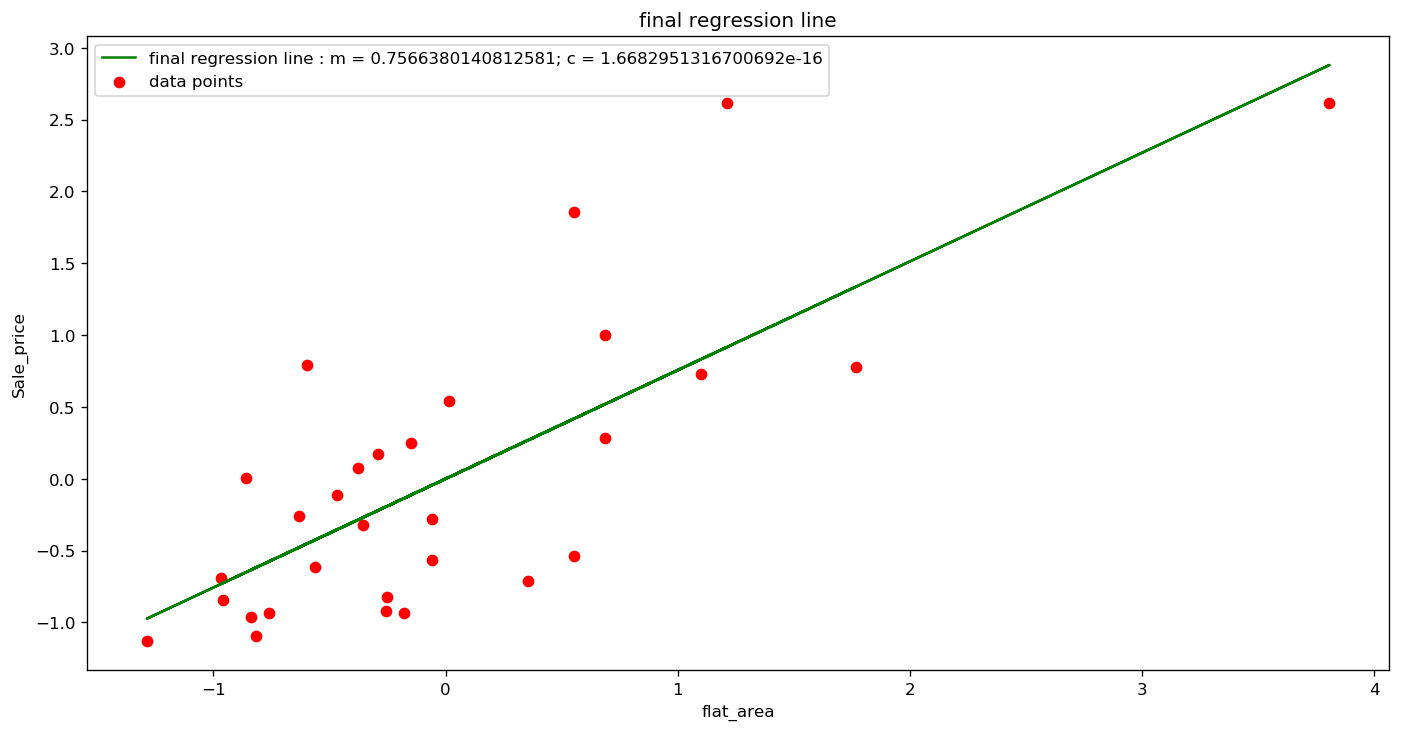

In [63]:
## defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1, 1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1, 1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: Initializing the values of m, c
m, c = param_init(sale_price)

## Gradient Descent in action
for i in range(0, max_iter):
    
    ## Step 2: generating predictions
    predictions = generate_predictions(m, c, flat_area)
    
    ## Step 3: calcuating cost
    cost_new = compute_cost(predictions, sale_price)
    
    ## checking if GD converged
    if abs(cost_new - cost_old)<10**(-7):
        break
        
    
    ## calculating gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    ## step 4: updating parameters m and c
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    ## display result after every 20 iterations
    if i%20 == 0:
        print('After iteration', i, ': m = ', m, '; c = ', c, '; Cost = ', cost_new)
    
    ### upating cost_old
    cost_old = cost_new

## final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

# T4 V1

### Assumptions of linear regression

#### 1. Linear Relationship
- The linear relation between target and independent variable
    * It need not be a perfect linear relation (i.e correlation = 1).
- But should follow a fundamental property of a linear relation

#### Fundamental Property of Linear Relation:
- Y changes with X and for every change of ΔX, the quantam of change in Y, i.e. ΔY should be similar irrespective of value of X
- At X = X(1), a change of ΔX cases ΔY change in value of Y, then at X = X(2) also a change of ΔX, should cause similar change as ΔY


- Large error
- Unreliable inferences about the data
- Failure of linear regression to model the pattern mathematically
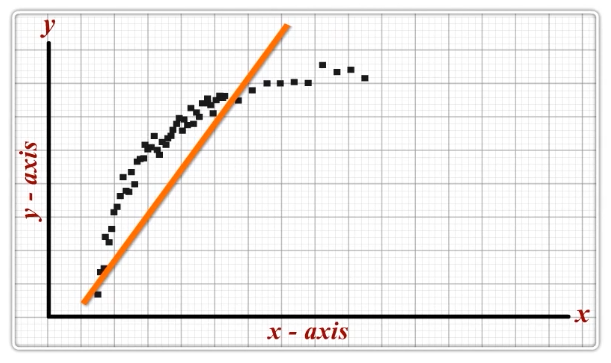

- Make the non-linear realtionship linear by using variable transformation operations such as X², √X or log(X)
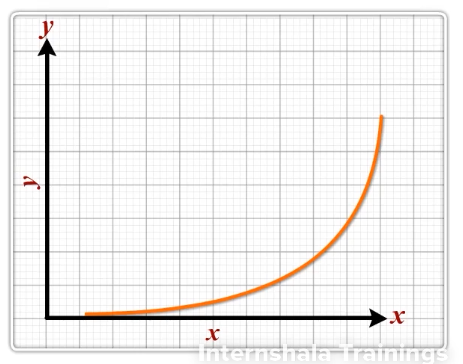

#### 2. Constant Variance of Error (Homoscedasticity)

- The variance of the errors is increasing as we go from left to right

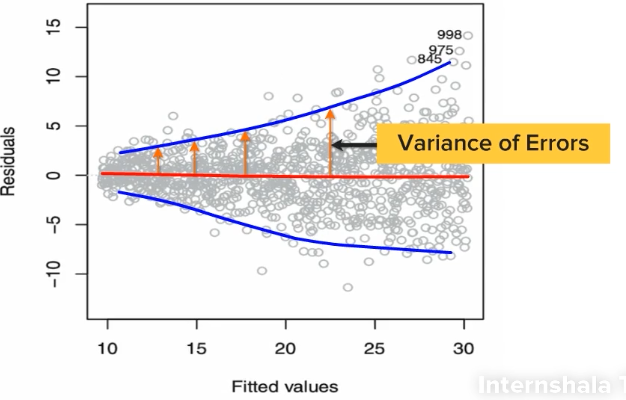
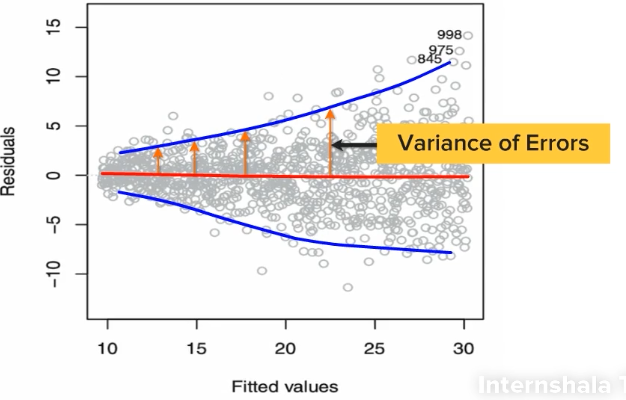

- Heteroscedasticity arise:
    * because the relationship between X and Y is not linear
    * due to the presence of outliers
- To counter Heteroscedasticity:
    * Treat outliers
    * Transform out data, using the transformation methods such as log(X), X², and √X
    
- The variance of the errors is nearly constant throughout the data
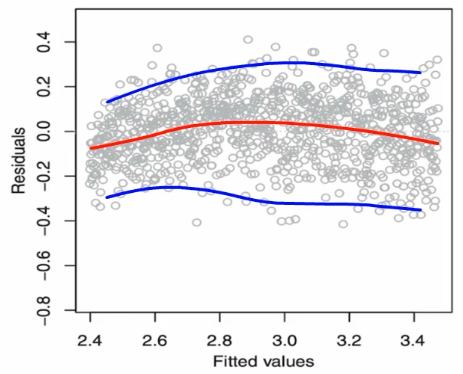

#  T4 V2
#### 3. Normal Distribution of Errors
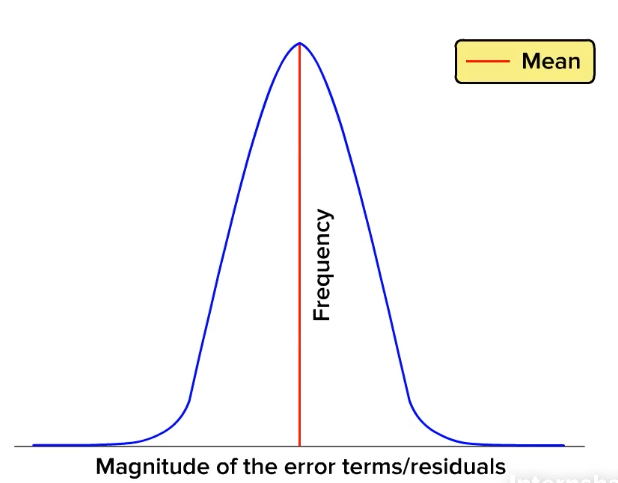

- Errors which do not follow the normal distribution:
    * Cause parameter estimations to be unstable
    * As a result coefficients can be misleading
- To counter the problem:
    * Scale the data to a linear scale using a sutiable transformation methods such as log(X), X², and √X

#### 4. No Correlation Between Error Terms
- Correlation tells us about the degree of relation between any two variables
- Did you know that there can be a correlation between the error terms too?

- Residual looks completely random
- No inherent pattern among residuals
- No information about the sign or value of the adjacent error terms
- Correlation of error terms is not observable

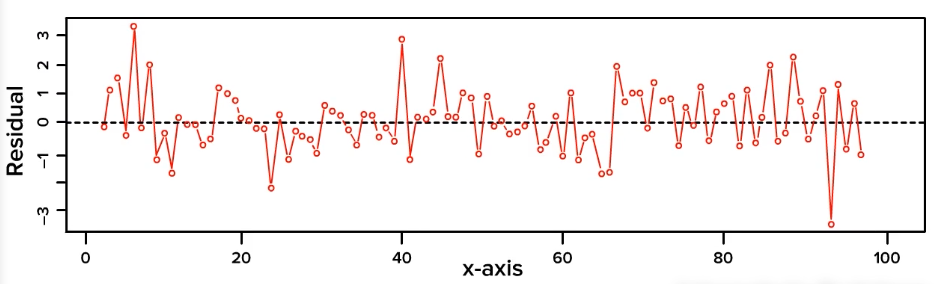

- Exterme case among the error terms
- Looking at the magnitude and the sign of any error term, we can clearly get an idea about the next error term
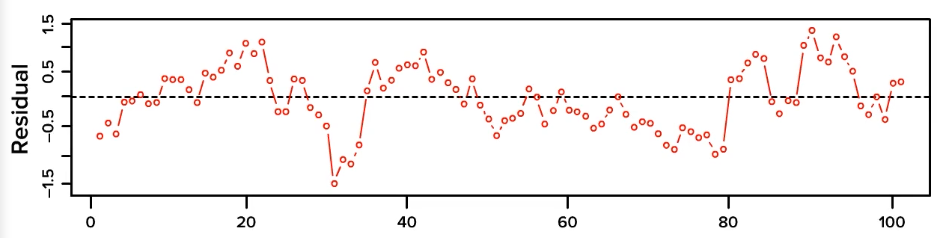

- When the residuals are auto correlated which means at the current error value is dependent on the previous value or the historic value
- A ddefinite unexplained pattern in the Y variable that shows up in the errors
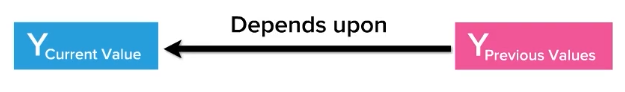

- Correlation among errors results in misinterpretation of the model outcome.
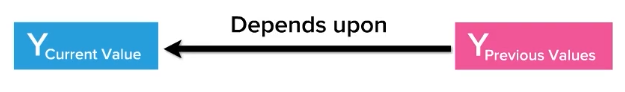

#### 5. Multicollinearity
- The correlation among the independent variables if correlation >0.5
    * one of the two independent variables is eliminated
- The highly correlated variables will result in a model with poor interpretation
- The variation in target variable to be explained by the second variable in the correlated pair has already been explained by the first variable is called multicollinearity
- Multcollinearity among independent variables must be removed
- Which variable should we removed?
#### Variance Inflation Factor (VIF)
- VIF is used for
    * Diagnosing collinearity/multicollinearity
    * Quantifying correlation between two independent variables
- Higher the VIF value associated with any independent variable, more correlated this variable is with all other independent variables put together
- How VIF is work?
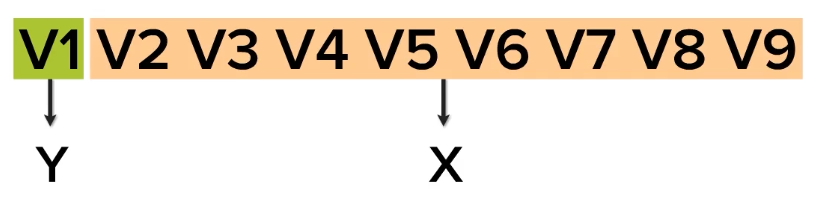

- VIF = 1/(1-R²)
    * A lower VIF - The independent variable is not correlated with other independent variables
    * A higher VIF - The independent variable is very well explained using the other variables and can be excluded
- VIF > 5
    * A good threshold
    * The independent variable is very well explained by the other independent variables and therefore can be removed

# T5 V1
### Treating Multicollinearity

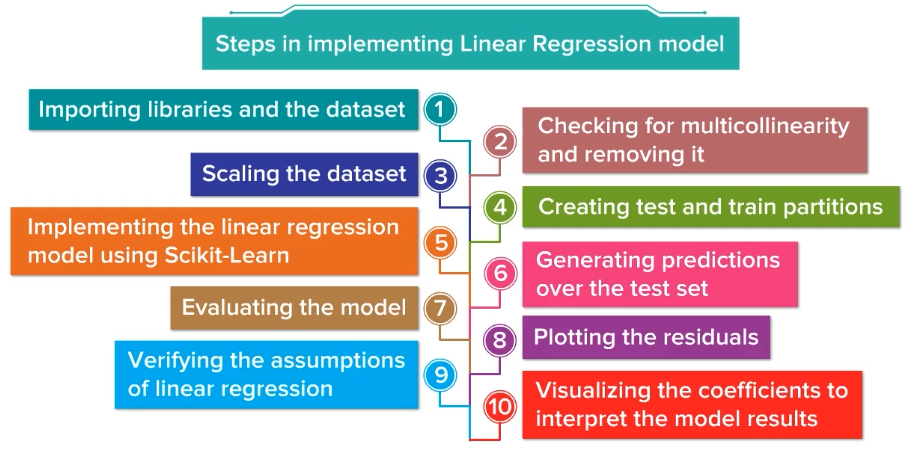

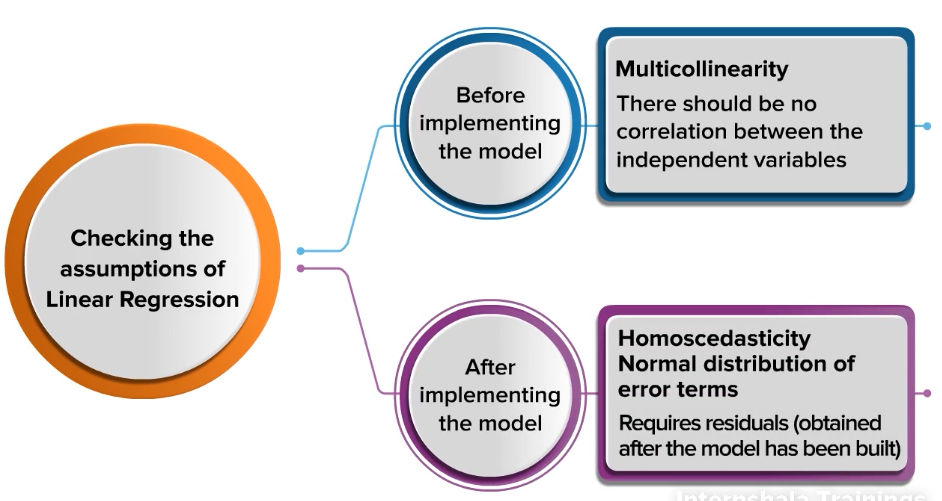

#### Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

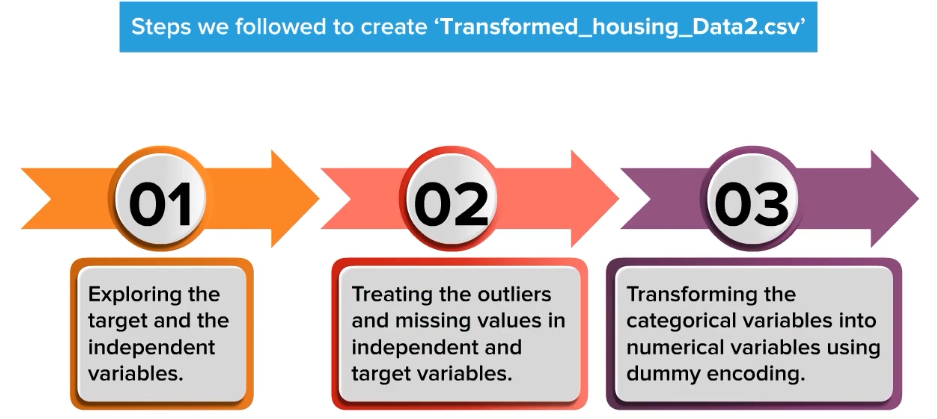

In [65]:
data = pd.read_csv("C:/Users/0526p/Jupyter/intershala ml training/ML M5/Transformed_Housing_Data2.csv")

#### Scaling the dataset

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
0       -0.398724        -1.447526            -0.979905           -0.228291   
1       -0.398724         0.175684             0.533718           -0.189858   
2       -1.474115        -1.447526            -1.426369           -0.123276   
3        0.676667         1.149611            -0.130534           -0.243983   
4       -0.398724        -0.148958            -0.435436           -0.169628   

   No of Floors  No of Times Visited  Overall Grade  \
0     -0.915389             -0.30579      -0.563993   
1      0.936817             -0.30579      -0.563993   
2     -0.915389             -0.30579      -1.468566   
3     -0.915389             -0.30579      -0.563993   
4     -0.915389             -0.30579       0.340581   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                  -0.734722                -0.658697   
1                                   0.460990                 0.245134   
2                                  -1.229916                -0.658697   
3                                  -0.891735                 1.397518   
4                                  -0.130827                -0.658697   

   Age of House (in Years)  ...  Waterfront_View_Yes  \
0                 0.544734  ...            -0.087181   
1                 0.680915  ...            -0.087181   
2                 1.293731  ...            -0.087181   
3                 0.204281  ...            -0.087181   
4                -0.544715  ...            -0.087181   

   Zipcode_Group_Zipcode_Group_1  Zipcode_Group_Zipcode_Group_2  \
0                      -0.350481                      -0.482158   
1                      -0.350481                       2.074011   
2                      -0.350481                       2.074011   
3                      -0.350481                      -0.482158   
4                      -0.350481                      -0.482158   

   Zipcode_Group_Zipcode_Group_3  Zipcode_Group_Zipcode_Group_4  \
0                      -0.419600                      -0.479094   
1                      -0.419600                      -0.479094   
2                      -0.419600                      -0.479094   
3                       2.383223                      -0.479094   
4                      -0.419600                       2.087275   

   Zipcode_Group_Zipcode_Group_5  Zipcode_Group_Zipcode_Group_6  \
0                      -0.214086                      -0.287712   
1                      -0.214086                      -0.287712   
2                      -0.214086                      -0.287712   
3                      -0.214086                      -0.287712   
4                      -0.214086                      -0.287712   

   Zipcode_Group_Zipcode_Group_7  Zipcode_Group_Zipcode_Group_8  \
0                      -0.112274                       -0.16885   
1                      -0.112274                       -0.16885   
2                      -0.112274                       -0.16885   
3                      -0.112274                       -0.16885   
4                      -0.112274                       -0.16885   

   Zipcode_Group_Zipcode_Group_9  
0                      -0.048158  
1                      -0.048158  
2                      -0.048158  
3                      -0.048158  
4                      -0.048158  

[5 rows x 30 columns]

#### Checking the correlation among the independent variables
- X.corr() function
    * It gives us the correlation begtween every possible pair of  variables in our dataset

In [67]:
X.corr()

No of Bedrooms  No of Bathrooms  \
No of Bedrooms                                   1.000000         0.515813   
No of Bathrooms                                  0.515813         1.000000   
Flat Area (in Sqft)                              0.576628         0.754568   
Lot Area (in Sqft)                               0.031692         0.087732   
No of Floors                                     0.175536         0.500776   
No of Times Visited                              0.079575         0.187791   
Overall Grade                                    0.349223         0.635638   
Area of the House from Basement (in Sqft)        0.477549         0.685088   
Basement Area (in Sqft)                          0.303294         0.283798   
Age of House (in Years)                         -0.154113        -0.505954   
Latitude                                        -0.008708         0.024570   
Longitude                                        0.129569         0.223171   
Living Area after Renovation (in Sqft)           0.391771         0.568568   
Lot Area after Renovation (in Sqft)              0.029264         0.087226   
Years Since Renovation                          -0.007198         0.003551   
Condition_of_the_House_Excellent                 0.028148        -0.034281   
Condition_of_the_House_Fair                      0.004778         0.190440   
Condition_of_the_House_Good                     -0.008847        -0.166037   
Condition_of_the_House_Okay                     -0.051957        -0.077419   
Ever_Renovated_Yes                               0.018573         0.050282   
Waterfront_View_Yes                             -0.006578         0.063761   
Zipcode_Group_Zipcode_Group_1                   -0.010603        -0.032810   
Zipcode_Group_Zipcode_Group_2                   -0.039342        -0.081460   
Zipcode_Group_Zipcode_Group_3                   -0.074129        -0.034459   
Zipcode_Group_Zipcode_Group_4                    0.024433         0.084054   
Zipcode_Group_Zipcode_Group_5                    0.019420         0.052804   
Zipcode_Group_Zipcode_Group_6                    0.090177         0.123256   
Zipcode_Group_Zipcode_Group_7                    0.016725         0.037746   
Zipcode_Group_Zipcode_Group_8                    0.102736         0.110012   
Zipcode_Group_Zipcode_Group_9                    0.035694         0.067871   

                                           Flat Area (in Sqft)  \
No of Bedrooms                                        0.576628   
No of Bathrooms                                       0.754568   
Flat Area (in Sqft)                                   1.000000   
Lot Area (in Sqft)                                    0.172721   
No of Floors                                          0.354142   
No of Times Visited                                   0.284678   
Overall Grade                                         0.705725   
Area of the House from Basement (in Sqft)             0.876226   
Basement Area (in Sqft)                               0.435142   
Age of House (in Years)                              -0.318146   
Latitude                                              0.052538   
Longitude                                             0.240091   
Living Area after Renovation (in Sqft)                0.756185   
Lot Area after Renovation (in Sqft)                   0.183223   
Years Since Renovation                                0.023503   
Condition_of_the_House_Excellent                     -0.018182   
Condition_of_the_House_Fair                           0.102627   
Condition_of_the_House_Good                          -0.083995   
Condition_of_the_House_Okay                          -0.065334   
Ever_Renovated_Yes                                    0.055111   
Waterfront_View_Yes                                   0.103841   
Zipcode_Group_Zipcode_Group_1                        -0.058817   
Zipcode_Group_Zipcode_Group_2                        -0.063005   
Zipcode_Group_Zipcode_Group_3           

- It is tedious to work through all these values.
- Is there any way to extract pair of independent variables which ahve high correlation with each other?
- Pair of independent variables with correlation greater than 0.5

In [68]:
# [str(i), str(j)] : The final list is collection of pairs of independent variables
# for i in k.columns for j in columns : In corr table we have independent variables along the rows as well as columns, the variables i and j willtake every possible combination of the independent variables
# if (k.loc[i, j]>abs(0.5)) & (i!=j) : the first part will takes values which is greater than 0.5 and the name of columns are not equal to each other

k = X.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i, j]>abs(0.5)) & (i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

- Every pair is occuring twice this is because
- The combinationo of i,j and j,i have the same correlation and hence both appear

# T5 V2
#### Calculating VIF

##### Importing variance_inflation_factor function from the statsmodels

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = X
vif_data.values


array([[-0.39872425, -1.44752588, -0.97990474, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-0.39872425,  0.1756844 ,  0.53371803, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-1.4741152 , -1.44752588, -1.42636901, ..., -0.11227393,
        -0.16884974, -0.04815825],
       ...,
       [-1.4741152 , -1.77216793, -1.1541347 , ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-0.39872425,  0.50032645, -0.5225511 , ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-1.4741152 , -1.77216793, -1.1541347 , ..., -0.11227393,
        -0.16884974, -0.04815825]])

In [70]:
vif_data.shape[1]

30

In [71]:
vif(vif_data.values, 0)

1.639470180681919

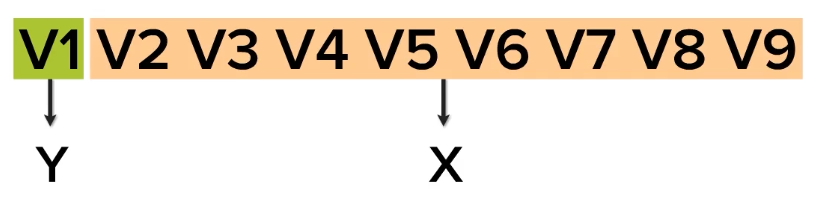

In [72]:
vif_data.columns

Index(['No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'No of Floors', 'No of Times Visited',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Years Since Renovation',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Condition_of_the_House_Okay',
       'Ever_Renovated_Yes', 'Waterfront_View_Yes',
       'Zipcode_Group_Zipcode_Group_1', 'Zipcode_Group_Zipcode_Group_2',
       'Zipcode_Group_Zipcode_Group_3', 'Zipcode_Group_Zipcode_Group_4',
       'Zipcode_Group_Zipcode_Group_5', 'Zipcode_Group_Zipcode_Group_6',
       'Zipcode_Group_Zipcode_Group_7', 'Zipcode_Group_Zipcode_Group_8',
       'Zipcode_Group_Zipcode_Group_9'],
      dtype='object')

In [73]:

# Calculating VIF for every column
VIF = pd.Series([vif(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)

In [74]:
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

- 7 variables have vif more than 5
- Do we remove all the 7 variables : No
- Removing only one variable from pair of correlated independent vaiables is enough
- if one variable is removed, there is a good chance that the VIF of other variables will go down

In [75]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

#### Remove the VIF Index Column

In [76]:
def MC_remover(vif_data):
    VIF = pd.Series([vif(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
    if VIF.max()>5:
        print(VIF[VIF== VIF.max()].index[0], 'has been removed')
        vif_data = vif_data.drop(columns = [VIF[VIF== VIF.max()].index[0]])
        return vif_data
    else:
        print('No Multicollinearity present anymore')
        return vif_data

In [77]:
for i in range(7):
    vif_data = MC_remover(vif_data)

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


In [78]:
vif_data.head()

No of Bedrooms  No of Bathrooms  Lot Area (in Sqft)  No of Floors  \
0       -0.398724        -1.447526           -0.228291     -0.915389   
1       -0.398724         0.175684           -0.189858      0.936817   
2       -1.474115        -1.447526           -0.123276     -0.915389   
3        0.676667         1.149611           -0.243983     -0.915389   
4       -0.398724        -0.148958           -0.169628     -0.915389   

   No of Times Visited  Overall Grade  \
0             -0.30579      -0.563993   
1             -0.30579      -0.563993   
2             -0.30579      -1.468566   
3             -0.30579      -0.563993   
4             -0.30579       0.340581   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                  -0.734722                -0.658697   
1                                   0.460990                 0.245134   
2                                  -1.229916                -0.658697   
3                                  -0.891735                 1.397518   
4                                  -0.130827                -0.658697   

   Age of House (in Years)  Latitude  ...  Waterfront_View_Yes  \
0                 0.544734 -0.352576  ...            -0.087181   
1                 0.680915  1.161645  ...            -0.087181   
2                 1.293731  1.283619  ...            -0.087181   
3                 0.204281 -0.283288  ...            -0.087181   
4                -0.544715  0.409587  ...            -0.087181   

   Zipcode_Group_Zipcode_Group_1  Zipcode_Group_Zipcode_Group_2  \
0                      -0.350481                      -0.482158   
1                      -0.350481                       2.074011   
2                      -0.350481                       2.074011   
3                      -0.350481                      -0.482158   
4                      -0.350481                      -0.482158   

   Zipcode_Group_Zipcode_Group_3  Zipcode_Group_Zipcode_Group_4  \
0                      -0.419600                      -0.479094   
1                      -0.419600                      -0.479094   
2                      -0.419600                      -0.479094   
3                       2.383223                      -0.479094   
4                      -0.419600                       2.087275   

   Zipcode_Group_Zipcode_Group_5  Zipcode_Group_Zipcode_Group_6  \
0                      -0.214086                      -0.287712   
1                      -0.214086                      -0.287712   
2                      -0.214086                      -0.287712   
3                      -0.214086                      -0.287712   
4                      -0.214086                      -0.287712   

   Zipcode_Group_Zipcode_Group_7  Zipcode_Group_Zipcode_Group_8  \
0                      -0.112274                       -0.16885   
1                      -0.112274                       -0.16885   
2                      -0.112274                       -0.16885   
3                      -0.112274                       -0.16885   
4                      -0.112274                       -0.16885   

   Zipcode_Group_Zipcode_Group_9  
0                      -0.048158  
1                      -0.048158  
2                      -0.048158  
3                      -0.048158  
4                      -0.048158  

[5 rows x 28 columns]

In [79]:
VIF = pd.Series([vif(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)

#### Remaining Cloumns
- None of the remaining variables have the VIF value over 5

In [80]:
VIF

No of Bedrooms                               1.638990
No of Bathrooms                              3.373805
Lot Area (in Sqft)                           2.107495
No of Floors                                 2.127703
No of Times Visited                          1.432363
Overall Grade                                2.956967
Area of the House from Basement (in Sqft)    4.580042
Basement Area (in Sqft)                      1.974981
Age of House (in Years)                      2.626504
Latitude                                     2.471343
Longitude                                    1.672667
Living Area after Renovation (in Sqft)       3.063886
Lot Area after Renovation (in Sqft)          2.144068
Years Since Renovation                       2.788064
Condition_of_the_House_Excellent             1.206487
Condition_of_the_House_Good                  1.251488
Condition_of_the_House_Okay                  1.025386
Ever_Renovated_Yes                           2.955539
Waterfront_View_Yes         

In [81]:
len(VIF)

28

# T5 V3

### Train/Test Set

In [82]:
x = vif_data
y = data['Sale_Price']

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

#### Linear Regression

- Implementing the linear regression using the sklearn library
- The lr.fit() function implements the gradient descent and the complete procedure ver the training data
- the gradient descent finds the best set of parameters to model the data

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

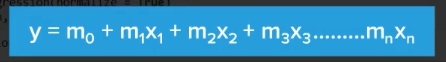
- Since data is normalized
    * m(0) = 0

In [85]:
lr.coef_

array([ -3995.28591458,  11902.27793003, 101937.22434576,  15031.10713549,
         2739.41413335,  27228.52739147,  59655.12354705, -11021.94849251,
       -21376.61844027,  28026.87248814,  21383.31819922, -23863.46356065,
        18135.87459276,  -2950.64270197, -10199.35434129,  30813.12311568,
        29521.356377  ,  32205.65517171,   3153.31349292,  14561.0226321 ,
        10798.73914992,  12141.12475095,  33834.10169629,  63262.46919428,
        81093.98126044,  50696.91127205,  73288.36977146,  40180.96604032,
        67426.94575079,  22107.36723561])

#### Generating the predictions over the test set
- This score() function calculates the R^2 values of the model we have created, so let's run this cell

In [86]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.846235554246878

# T5 V4
### Verifying the Assumptions of Linear Regression

#### 2. Making residual plot to verify assumptions
- Q. why are we arranging the residual values?
    - Earlier, no independent variable was used while plotting the residual plot of the mean regression model
    - But now, there are multiple independent variables to look at.
- Q. How do we visualize the residual plot where we have multiple independent variables?
    * The pridicted vlaues of the Y(hat) values represent the effect/outcome of all the independent variables combined

In [87]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals': residuals,
                              'predictions': predictions})
residual_table = residual_table.sort_values(by = 'predictions')

In [88]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

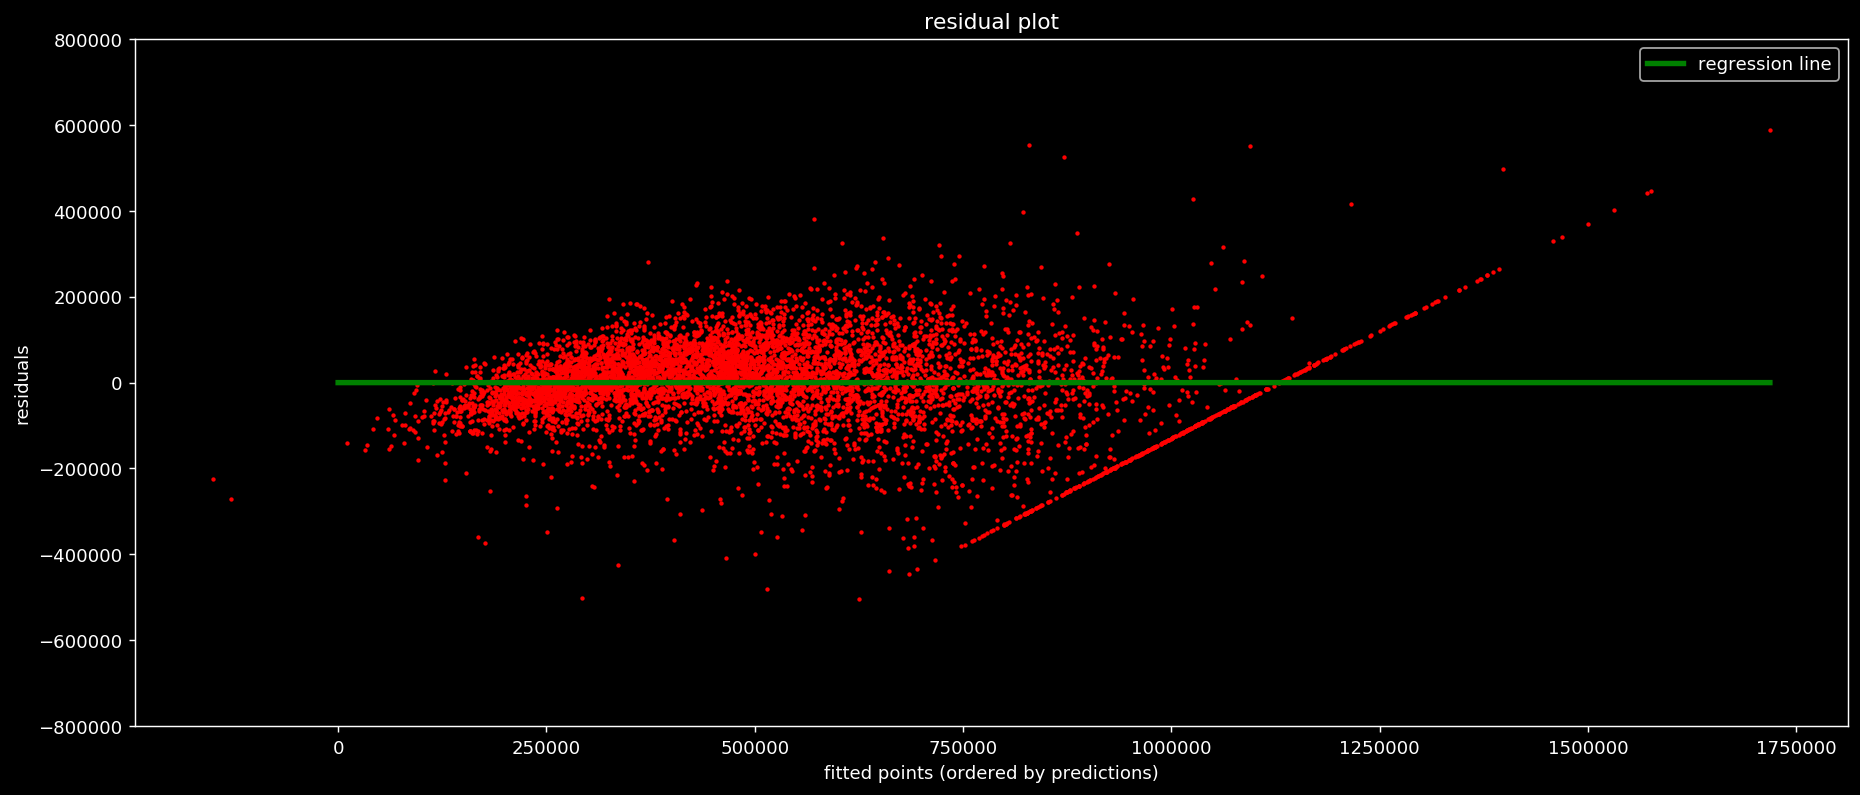

In [89]:
plt.figure(dpi = 130, figsize = (17, 7))
plt.scatter(residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

- Discription of above graph
    - The residuals are densely populated between the limits 200000, -200000
    - There is a good probability that the residuals are normally distributed
    - The residual plot resembles neither the cone shape nor the pipe shape
    - There is some scope of improvements in the data
    - There are some outliers with positive magnitude

#### 3. Distribution of Erros

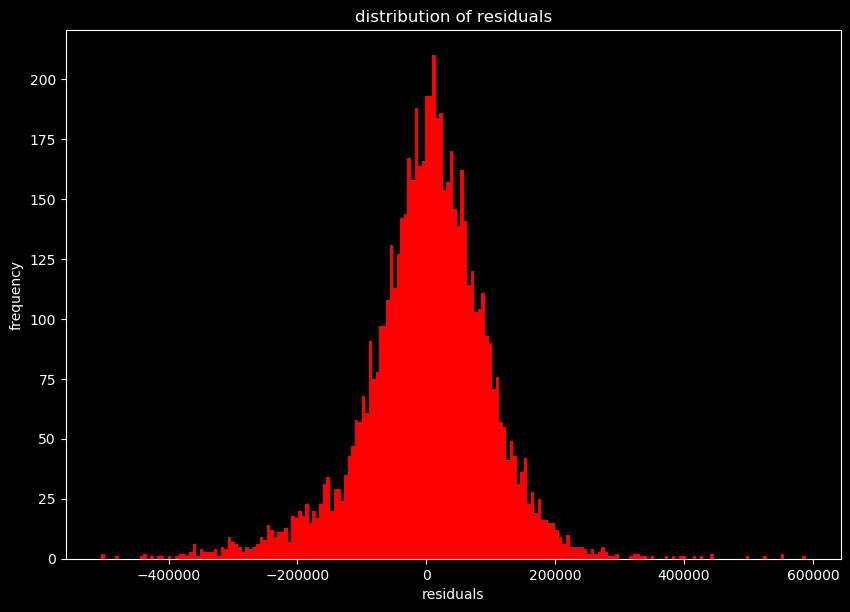

In [90]:
plt.figure(dpi = 100, figsize = (10, 7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

- Discription of above graph
    * The residuals follow the normal distribution
    * Magnitude of cofficients

# T5 V5
### Interpreting the Results of Your Linear Regression Model

#### 4. Model Cofficients

In [91]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

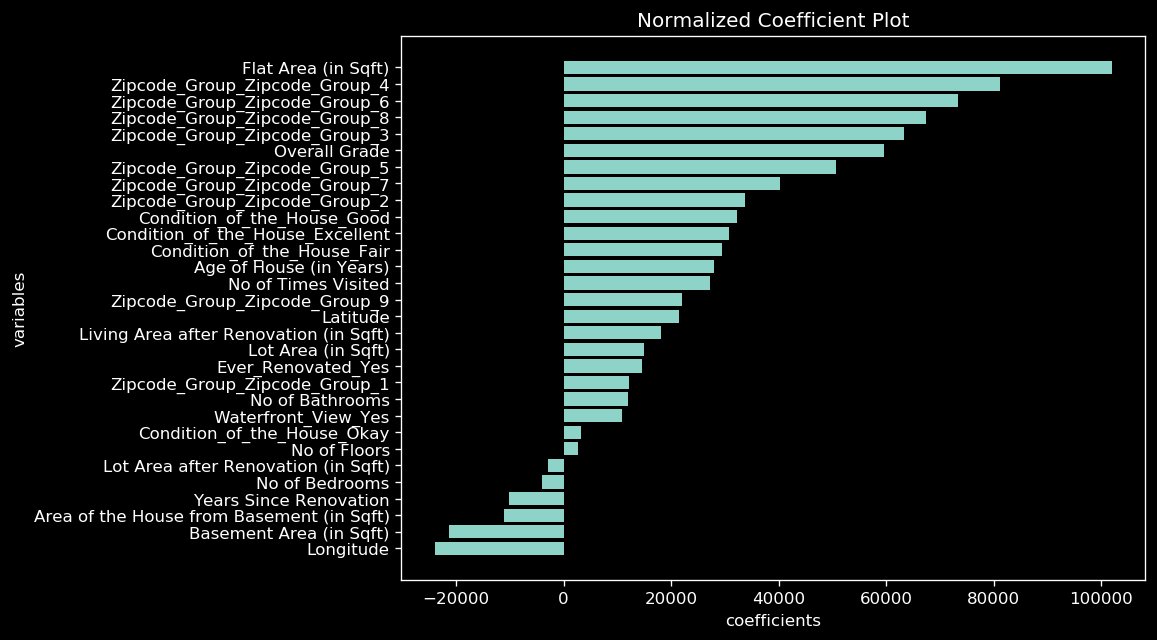

In [92]:
plt.figure(figsize = (8, 6), dpi = 120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh(x, y)
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('Normalized Coefficient Plot')
plt.show()

- Description of Above Graph:
    * The location plats a mojor role in the 'Sale_Price' of the House
    * The 'Area of House from Basement' plays a major role in the 'Sale_Price' of the House
    * The overall grade plays a major role in the 'Sale_Price' of the House
    * The older houses are more expensie than the newer ones
    * Remaining variables also played a significant positive roles
    * Negative significance - As the time from the last renovation of the house is increased, the price of the house is decreased
    * Latitude and Longitude: The houses in the North East region have relatively higher prices than other places

# T6 V1
### Feature Engineering
- Q. Is there any other way which will help us in boosting the model performance?
- The Technique of generatingn new features using the existing features is called feature engineering
- The science of extracting more information from existing data
- Any new data is not added, the data we already have is made more useful w.r.t problem in hand

In [93]:
data.isnull().sum()

Sale_Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
No of Times Visited                          0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Years Since Renovation                       0
Condition_of_the_House_Excellent             0
Condition_of_the_House_Fair                  0
Condition_of_the_House_Good                  0
Condition_of_the_House_Okay                  0
Ever_Renovated_Yes                           0
Waterfront_Vi

#### Feature Engineering:
- Feature Preprocessing
    * Changing, updating or transforming the existing features



- Feature Generation
    * Generating new features from the existing features

- Q. how is feature processing different from feature generation?
     * Feature generation refers to creating new features from the existing data and not simply transforming the values of existing features

# T6 V2
#### Feature Processing
- Feature(x) ----f(x)----> New Feature(x')
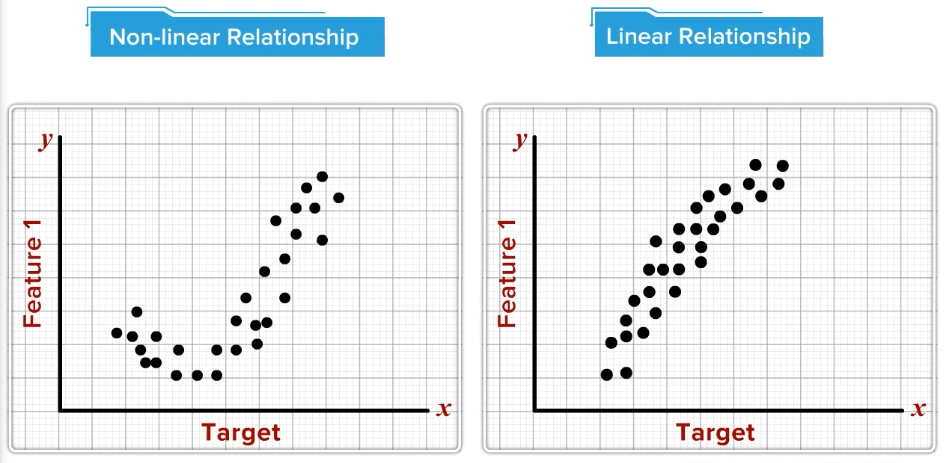
    - Tranforming to linearize the relation between the target variable and the feature
    - Feature transforming is model specific

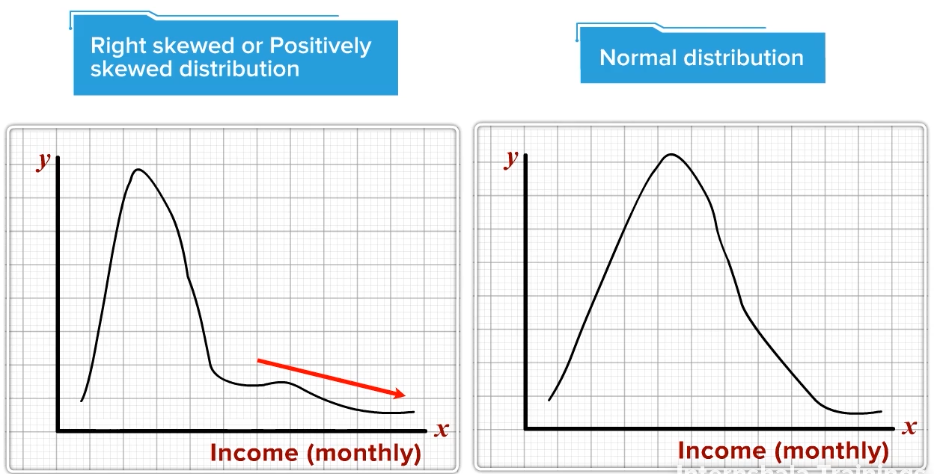
    * Transformation is used to reduce skewness
    * Right Skewed : The hump is on the left
    * Left skewed : The hump is on the right

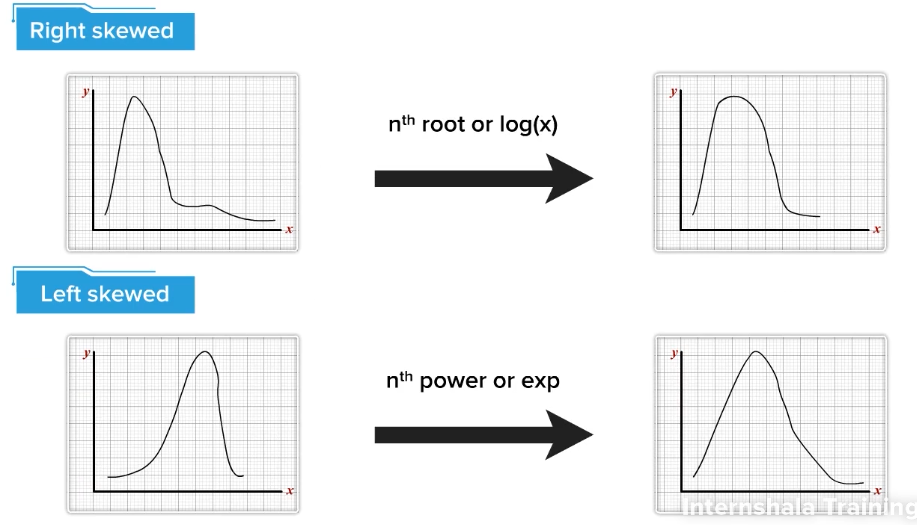

In [154]:
raw_housing_data = pd.read_csv("C:/Users/0526p/Jupyter/intershala ml training/ML M6/Raw_Housing_Prices.csv")

In [155]:
# No transformation with the independent variables has been done
raw_housing_data.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Overall Grade  \
0              No                None  ...             7   
1              No                None  ...             7   
2              No                None  ...             6   
3              No                None  ...             7   
4              No                None  ...             8   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                     1180.0                        0   
1                                     2170.0                      400   
2                                      770.0                        0   
3                                     1050.0                      910   
4                                     1680.0                        0   

   Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  \
0                       63               0  98178.0   47.5112   -122.257   
1                       67            1991  98125.0   47.7210   -122.319   
2                       85               0  98028.0   47.7379   -122.233   
3                       53               0  98136.0   47.5208   -122.393   
4                       31               0  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)  
0                                  1340.0                                 5650  
1                                  1690.0                                 7639  
2                                  2720.0                                 8062  
3                                  1360.0                                 5000  
4                                  1800.0                                 7503  

[5 rows x 21 columns]

#### Feature Transformation

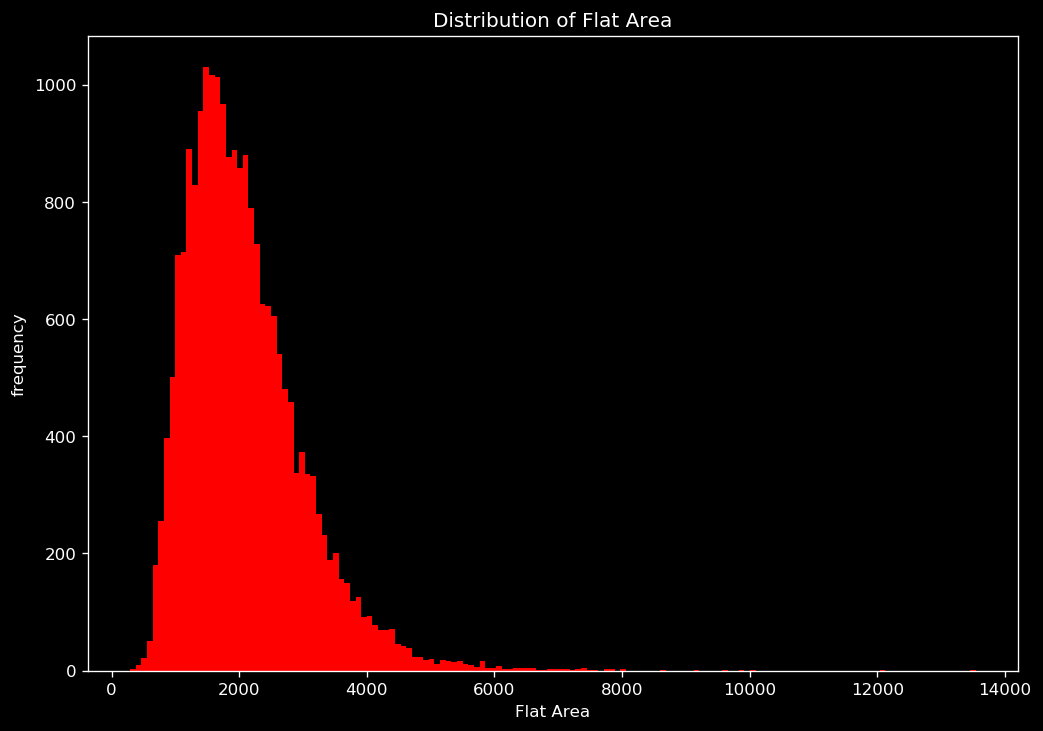

Flat Area is RIGHT SKEWED


In [138]:
plt.figure (figsize = (10, 7), dpi = 120)
plt.hist(raw_housing_data['Flat Area (in Sqft)'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()
print('Flat Area is RIGHT SKEWED')

In [139]:
def log_transform(sample_data):
    return np.log(sample_data)

In [140]:
raw_housing_data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(log_transform)

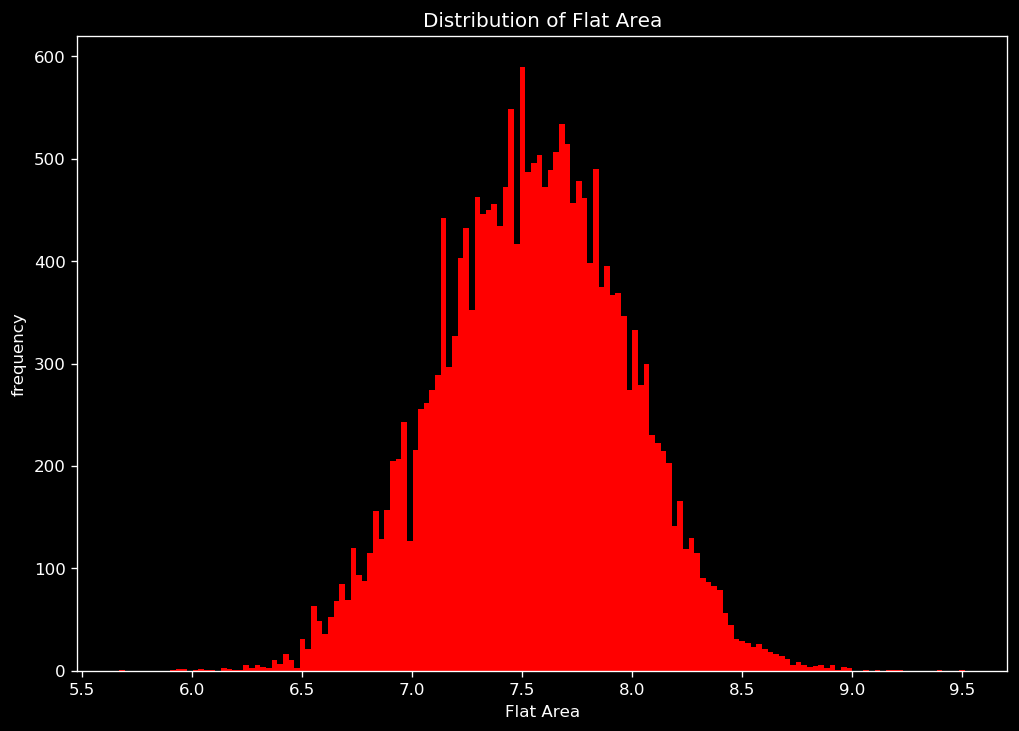

Flat Area is RIGHT SKEWED


In [141]:
plt.figure (figsize = (10, 7), dpi = 120)
plt.hist(raw_housing_data['Transformed Flat Area'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()
print('Flat Area is RIGHT SKEWED')

# T6 V3
#### Feature Transformation (Categorical Encoding)

- A variable transformaiton technique for the categorical variables
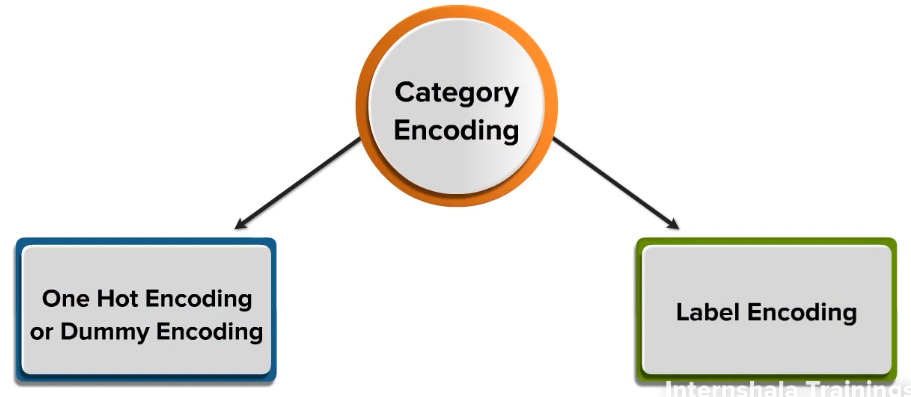

- Dummy Encoding: 
    * A separate dummy feature is created for every level present in the categorical column
- Label Encoding:
    * Simple
    * The model detects the relation between the individual categories by itself using the gradient descent
    * To preserve the existing order among the different categories of the columns
    * Use Case: Label encoding is used when the order among different levels is known
- Downside of using the dummy encoding:
    * Increase in the dimensionality
    * Having too many features inhibits the optimum learning

- The order in the feature 'Condition of the House' is as follows:
    * Bad< Okay< Fair< Good< Excellent
    * A new coloumn for each level in our categorical variable can be avoided
    * The dimensionality stays the same

In [142]:
label_encoded = raw_housing_data['Condition of the House']
label_encoded.value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [143]:
label_encoded = label_encoded.map({'Bad':1,
                                  'Okay': 2,
                                  'Fair': 3,
                                  'Good': 4,
                                  'Excellent': 5})
label_encoded.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# T6 V4
### Feature Transformation (Binning)

#### Binnning:
- Is the process of aggregatingh data points in different categories to reduce the redundancy
- Can be implemented on both the numerical and categorical columns
- Binning Helps in:
    * Reducing the redundancy of the independent variables
    * Carrrying out One-Hot_Encoding or ccreating the dummy variables
- In Binning, we will look at the following:
    * Binning of categorical Variables
    * Binning of sparse categories
    * Binning of continuous variables


#### Sparse Categories:
- The ones which ouccur for a negligible or few numbers of times are compared to the size of the datasets.
- Sparse Binning:
    * Binning the categories which are sparse in nature.

In [177]:
raw_housing = pd.read_csv("C:/Users/0526p/Jupyter/intershala ml training/ML M6/Raw_Housing_Prices.csv")

In [178]:
raw_housing['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [179]:
raw_housing['Condition of the House'].value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [180]:
mean = []
for i in raw_housing['Condition of the House'].unique():
    mean.append(raw_housing['Sale Price'][raw_housing['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Price')

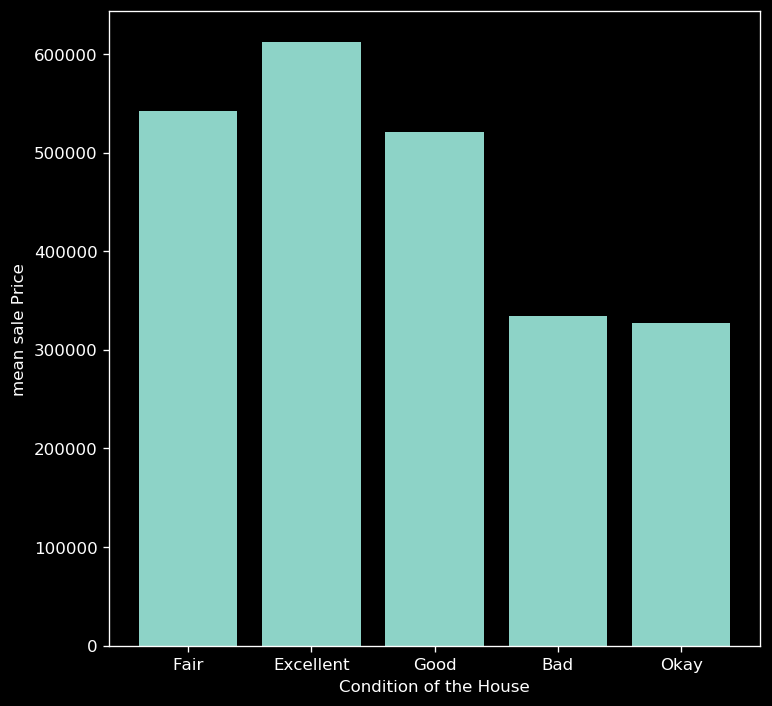

In [181]:
plt.figure(figsize = (7, 7), dpi = 120)

plt.bar(raw_housing['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel('mean sale Price')

In [176]:
mapping = {'Excellent': 'Excellent',
          'Fair': 'Good',
          'Good': 'Good',
          'Okay':'Okay',
          'Bad':'Okay'}

In [182]:
raw_housing['Condition of the House'] = raw_housing['Condition of the House'].map(mapping)

In [183]:
raw_housing['Condition of the House'].unique()

array(['Good', 'Excellent', 'Okay'], dtype=object)

In [188]:
mean=[]
for i in data['Conditon of the House'].unique():
    mean.append(raw_housing['Sale Price'][raw_housing['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale price')

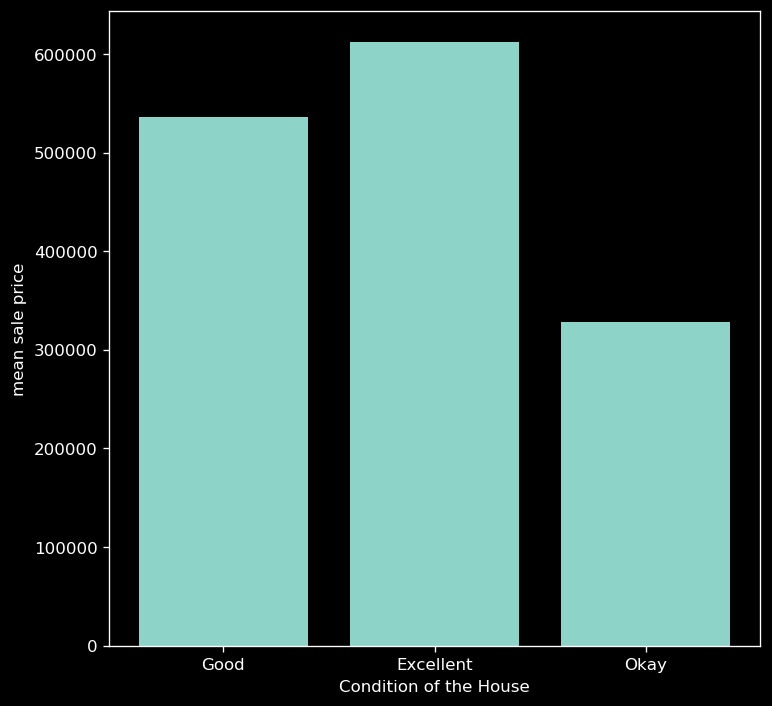

In [191]:
plt.figure(figsize = (7, 7), dpi = 120)
plt.bar(raw_housing['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel('mean sale price')

In [195]:
len(raw_housing['Age of House (in Years)'].unique())

116

In [198]:
raw_housing['Age of House (in Years)'].max()

118

In [199]:
raw_housing['Age of House (in Years)'].min()

3

##### Note: 
##### - Binning of continuous variable results in loss of information
##### - Binning of a continuous variable results in an incurease in the dimensionality of the dataset

In [204]:
def age_of_house(x):
    if x<10:
        x = 'new'
    elif x<50:
        x = 'old'
    else:
        x = 'very old'
    return x

In [205]:
cat_house_age = raw_housing['Age of House (in Years)'].map(age_of_house)

In [207]:
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

# T6 V5
### Feature Generation

#### Feature Extraction:
- The process of extracting information from the original features
- The extracted feature contains the information in simpler form
- The information can be used to increase the model performance

In [230]:
raw_housing['Date House was Sold'].head(5)

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [214]:
time = pd.DatetimeIndex(raw_housing['Date House was Sold'])
raw_housing['year_sold'] = time.year
raw_housing['month_sold'] = time.month
raw_housing['weekday_sold'] = time.weekday_name
raw_housing['date_sold'] = time.days_in_month

raw_housing[['year_sold', 'month_sold', 'weekday_sold', 'date_sold']].head()

year_sold  month_sold weekday_sold  date_sold
0       2017          10     Saturday         31
1       2017          12     Thursday         31
2       2016           2       Monday         29
3       2017          12     Thursday         31
4       2016           2       Monday         29

#### Combination of Features:
- Efficient combination of two features can result in improved prediciotn power of our model
- Why are we interested in defining this variable?
    * To make better predicitons for the 'Sale Price' of the House

In [215]:
def luxury_home(value):
    count = 0
    if value[0] == 'Yes':
        count = count + 1
    if value[1] in ['Good', 'Excellent']:
        count = count + 1
    if value[2] >= 8:
        count = count + 1
    if count >= 2:
        return 'Yes'
    else:
        return 'No'

raw_housing['Luxury Home'] = raw_housing[['Waterfront View', 'Condition of the House', 'Overall Grade']].apply(luxury_home, axis = 1)
raw_housing['Luxury Home'].unique()

array(['No', 'Yes'], dtype=object)

In [226]:
luxury = raw_housing.pivot_table(values = 'Sale Price', columns = 'Luxury Home', aggfunc = 'mean')
luxury

Luxury Home             No            Yes
Sale Price   383532.204342  711447.798528

Text(0, 0.5, 'Mean Sale Price')

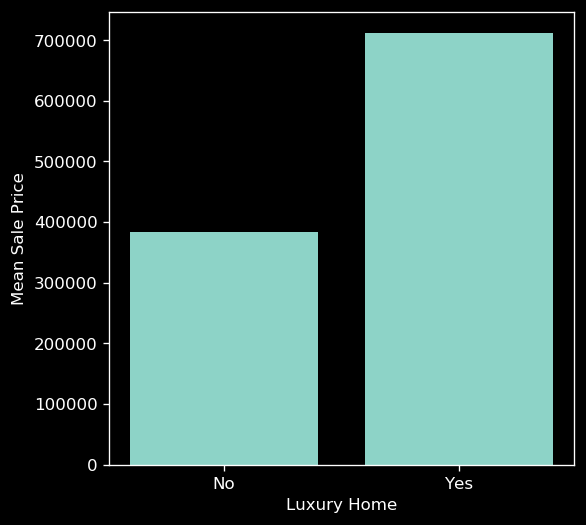

In [228]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury Home')
plt.ylabel('Mean Sale Price')

- Feature Engineering
    - Methods can vary drasticlaly from probelm to problem
    - Does not always work
    - Can increase the model Performance sinificnatly